<a href="https://colab.research.google.com/github/uday-uppal/Heart-Disease-Prediction-Project/blob/main/Heart_Attack_Prediction_System.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns 
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import confusion_matrix, classification_report
from sklearn.metrics import ConfusionMatrixDisplay
from scipy.stats import mode

# Extracting the Data

In [ ]:
df = pd.read_csv('heart.csv')

# Analysis

In [ ]:
df.shape

(303, 14)

In [ ]:
# print(df)
df.head(n = 10)

,age,sex,cp,trtbps,chol,fbs,restecg,thalachh,exng,oldpeak,slp,caa,thall,output
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1
5,57,1,0,140,192,0,1,148,0,0.4,1,0,1,1
6,56,0,1,140,294,0,0,153,0,1.3,1,0,2,1
7,44,1,1,120,263,0,1,173,0,0.0,2,0,3,1
8,52,1,2,172,199,1,1,162,0,0.5,2,0,3,1
9,57,1,2,150,168,0,1,174,0,1.6,2,0,2,1


### We have 303 rows and 14 coumns

In [ ]:
df.describe()

,age,sex,cp,trtbps,chol,fbs,restecg,thalachh,exng,oldpeak,slp,caa,thall,output
count,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000
mean,54.366337,0.683168,0.966997,131.623762,246.264026,0.148515,0.528053,149.646865,0.326733,1.039604,1.399340,0.729373,2.313531,0.544554
std,9.082101,0.466011,1.032052,17.538143,51.830751,0.356198,0.525860,22.905161,0.469794,1.161075,0.616226,1.022606,0.612277,0.498835
min,29.000000,0.000000,0.000000,94.000000,126.000000,0.000000,0.000000,71.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,47.500000,0.000000,0.000000,120.000000,211.000000,0.000000,0.000000,133.500000,0.000000,0.000000,1.000000,0.000000,2.000000,0.000000
50%,55.000000,1.000000,1.000000,130.000000,240.000000,0.000000,1.000000,153.000000,0.000000,0.800000,1.000000,0.000000,2.000000,1.000000
75%,61.000000,1.000000,2.000000,140.000000,274.500000,0.000000,1.000000,166.000000,1.000000,1.600000,2.000000,1.000000,3.000000,1.000000
max,77.000000,1.000000,3.000000,200.000000,564.000000,1.000000,2.000000,202.000000,1.000000,6.200000,2.000000,4.000000,3.000000,1.000000


<H1> Medical Definitions </H1>

**Age :** Age of the patient

**Sex :** Sex of the patient

**cp :** Chest Pain type chest pain type <BR>
Value 1: typical angina <BR>
Value 2: atypical angina <BR>
Value 3: non-anginal pain <BR>
Value 4: asymptomatic

**trtbps :** resting blood pressure (in mm Hg)

**chol :** cholestoral in mg/dl fetched via BMI sensor

**fbs :** (fasting blood sugar > 120 mg/dl) (1 = true; 0 = false)

**thalachh :** maximum heart rate achieved

**rest_ecg :** resting electrocardiographic results <BR>
Value 0: normal <BR>
Value 1: having ST-T wave abnormality (T wave inversions and/or ST elevation or depression of > 0.05 mV) <BR>
Value 2: showing probable or definite left ventricular hypertrophy by Estes' criteria

**exng :** exercise induced angina (1 = yes; 0 = no)

**oldpeak :** ST depression induced by exercise relative to rest

**slp :** the slope of the peak exercise ST segment <BR>
0 = unsloping <BR>
1 = flat <BR>
2 = downsloping

**caa :** number of major vessels (0-3)

**thall :** thalassemia <BR>
0 = null <BR>
1 = fixed defect <BR>
2 = normal <BR>
3 = reversable defect

**output :** <BR>
0= less chance of heart attack <BR> 
1= more chance of heart attack

In [ ]:
df.nunique()

age          41
sex           2
cp            4
trtbps       49
chol        152
fbs           2
restecg       3
thalachh     91
exng          2
oldpeak      40
slp           3
caa           5
thall         4
output        2
dtype: int64

In [ ]:
df.isna().sum()

age         0
sex         0
cp          0
trtbps      0
chol        0
fbs         0
restecg     0
thalachh    0
exng        0
oldpeak     0
slp         0
caa         0
thall       0
output      0
dtype: int64

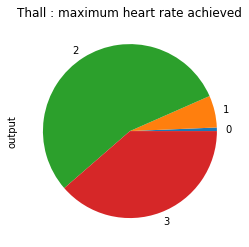

In [ ]:
df.groupby('thall')["output"].count().plot(kind="pie", title="Thall : maximum heart rate achieved")

In [ ]:
df.dtypes

age           int64
sex           int64
cp            int64
trtbps        int64
chol          int64
fbs           int64
restecg       int64
thalachh      int64
exng          int64
oldpeak     float64
slp           int64
caa           int64
thall         int64
output        int64
dtype: object

### Gender of Patient

#### MALE : 0 
#### FEMALE : 1

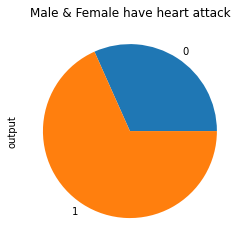

In [ ]:
df.groupby('sex')["output"].count().plot(kind="pie",title="Male & Female have heart attack")

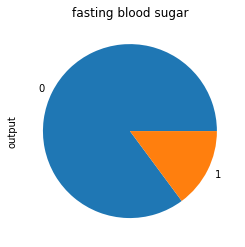

In [ ]:
df.groupby('fbs')["output"].count().plot(kind="pie",title="fasting blood sugar")

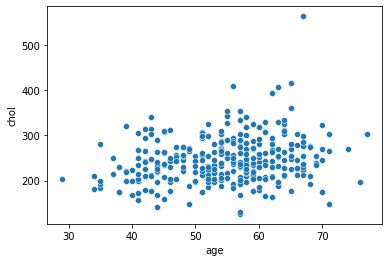

In [ ]:
sns.scatterplot(x="age",y="chol",data=df)

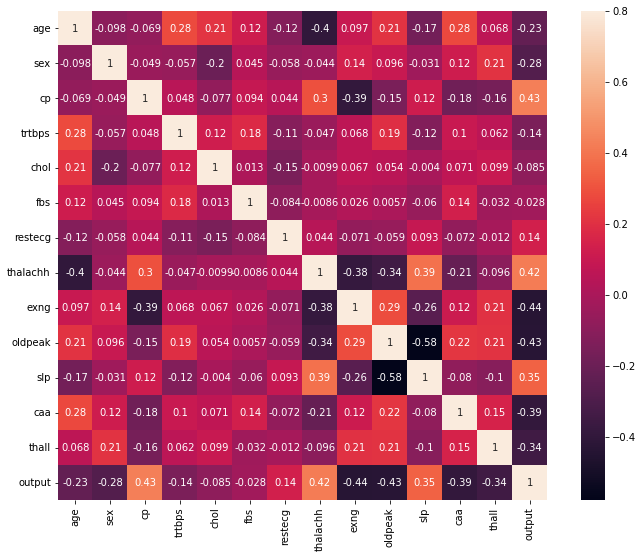

In [ ]:
corrmat = df.corr()
f, ax = plt.subplots(figsize=(12, 9))
sns.heatmap(corrmat, vmax=.8, square=True, annot=True);

# Pre-Processing

In [ ]:
X = df.iloc[: , 0:-1 ]
Y = df['output']

X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size = 0.25 ,random_state = 42)

sc = StandardScaler()
X_test = sc.fit_transform(X_test)
X_train = sc.transform(X_train)

# Implementing Classsifer

## Logistic Regression

In [ ]:
def F1Score(y, y_predicted):
    tp,tn,fp,fn = 0,0,0,0
    r=[]
    for i in range(len(y)):
        if (y[i] == 1 and y_predicted[i] == 1):
            tp += 1
        elif y[i] == 1 and y_predicted[i] == 0:
            fn += 1
        elif y[i] == 0 and y_predicted[i] == 1:
            fp += 1
        elif (y[i] == 0 and y_predicted[i] == 0):
            tn += 1
    precision = tp / (tp + fp)
    recall = tp / (tp + fn)
    f1 = 2 * precision * recall / (precision + recall)
    return f1    

class LogisticRegression:
  def fit(self, X_train, Y_train, alpha = 0.1, n = 2000):
    X_train = np.insert(X_train, 0, values = 1, axis = 1)
    m, k = X_train.shape 
    self.beta = np.zeros(k)
    for i in range(n): 
      cost_gradient = np.zeros(k) 
      z = X_train.dot(self.beta) 
      p = 1 / (1 + np.exp(-z))  
      for j in range(k):
        cost_gradient[j] = np.sum((p - Y_train).dot(X_train[:,j])) 
      for j in range(k):
        self.beta[j] = self.beta[j] - (alpha / m) * cost_gradient[j] 
    return self.beta

  def predict(self, X_test):
    X_test = np.insert(X_test, 0, values = 1, axis = 1)
    z = X_test.dot(self.beta)
    Y_predict = 1 / (1 + np.exp(-z)) 
    Y_label = np.zeros(len(Y_predict))
    for i in range(len(Y_predict)):
      if(Y_predict[i] >= 0.5): 
        Y_label[i] = 1
    return Y_label

In [ ]:
def find_accuracy(y, y_predicted):
      tp,tn,fp,fn = 0,0,0,0
      r=[]
      for i in range(len(y)):
          if (y[i] == 1 and y_predicted[i] == 1):
              tp += 1
          elif y[i] == 1 and y_predicted[i] == 0:
              fn += 1
          elif y[i] == 0 and y_predicted[i] == 1:
              fp += 1
          elif (y[i] == 0 and y_predicted[i] == 0):
              tn += 1
      accuracy = (tp + tn) / (tp + tn + fp + fn)
      return round(accuracy, 2)

X_train_LR, y_train_LR, X_test_LR, Y_test_LR = np.array(X_train), np.array(y_train), np.array(X_test), np.array(y_test)
max_accuracy, best_alpha = 0, 0.01
for alpha in np.arange(0.001, 1, 0.001):
  clf = LogisticRegression()
  clf2 = clf.fit(X_train_LR, y_train_LR, alpha)
  predictions = clf.predict(X_test_LR)
  accuracy = find_accuracy(Y_test_LR,predictions)
  #print(alpha, " - ", accuracy)
  if accuracy > max_accuracy:
    max_accuracy = accuracy
    best_alpha = alpha
print(best_alpha)

X_train_LR, y_train_LR, X_test_LR, Y_test_LR = np.array(X_train), np.array(y_train), np.array(X_test), np.array(y_test)
clf2 = clf.fit(X_train_LR, y_train_LR, best_alpha)
predictions = clf.predict(X_test_LR)

0.001


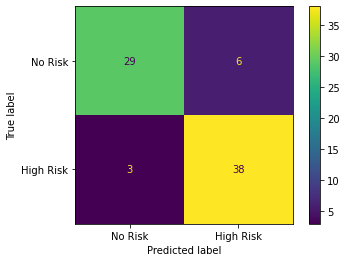

In [ ]:
cm = confusion_matrix(Y_test_LR, predictions)
disp = ConfusionMatrixDisplay(cm, display_labels = ['No Risk','High Risk']).plot()
plt.show()

In [ ]:
print(classification_report(Y_test_LR,predictions))

              precision    recall  f1-score   support

           0       0.91      0.83      0.87        35
           1       0.86      0.93      0.89        41

    accuracy                           0.88        76
   macro avg       0.88      0.88      0.88        76
weighted avg       0.88      0.88      0.88        76



## KNN


In [ ]:
def find_accuracy(y, y_predicted):
      tp,tn,fp,fn = 0,0,0,0
      r=[]
      for i in range(len(y)):
          if (y[i] == 1 and y_predicted[i] == 1):
              tp += 1
          elif y[i] == 1 and y_predicted[i] == 0:
              fn += 1
          elif y[i] == 0 and y_predicted[i] == 1:
              fp += 1
          elif (y[i] == 0 and y_predicted[i] == 0):
              tn += 1
      accuracy = (tp + tn) / (tp + tn + fp + fn)
      return round(accuracy, 2)

class K_Nearest_Neighbors_Classifier() :   
    def __init__( self, K ) :      
        self.K = K      

    def fit( self, X_train, Y_train ) :
        self.X_train = X_train
        self.Y_train = Y_train
        self.m, self.n = X_train.shape
      
    def predict( self, X_test ) : 
        self.X_test = X_test  
        self.m_test, self.n = X_test.shape
        Y_predict = np.zeros( self.m_test )  
        for i in range( self.m_test ) :
            x = self.X_test[i] 
            neighbors = np.zeros( self.K )
            neighbors = self.find_neighbors( x )
            Y_predict[i] = mode( neighbors )[0][0]    
        return Y_predict
            
    def find_neighbors( self, x ) : 
        euclidean_distances = np.zeros( self.m )
        for i in range( self.m ) :     
            d = self.euclidean( x, self.X_train[i] ) 
            euclidean_distances[i] = d
        ind = euclidean_distances.argsort()
        Y_train_sorted = np.zeros( self.K )
        self.Y_train=np.array(self.Y_train)
        for i in range(self.K):
            Y_train_sorted[i] = self.Y_train[ind[i]]
        return Y_train_sorted
              
    def euclidean( self, x, x_train ) : 
        return np.sqrt( np.sum( np.square( x - x_train ) ) )
  

In [ ]:
max_accuracy, best_k = 0, 1
for k in range (1, len(X_train)):
  myKNN = K_Nearest_Neighbors_Classifier(k)
  myKNN.fit(X_train, y_train)
  y_predict = myKNN.predict(X_test)
  accuracy = find_accuracy(np.array(y_test),y_predict)
  #print(k, " - ", accuracy)
  if accuracy > max_accuracy:
    max_accuracy = accuracy
    best_k = k
print(best_k)

5


In [ ]:
myKNN = K_Nearest_Neighbors_Classifier(best_k)
myKNN.fit(X_train, y_train)
y_predict = myKNN.predict(X_test)

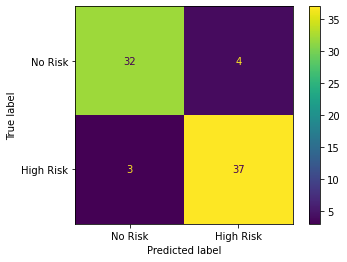

In [ ]:
cm = confusion_matrix(y_predict, y_test)
disp = ConfusionMatrixDisplay(cm, display_labels = ['No Risk','High Risk']).plot()
plt.show()

In [ ]:
print(classification_report(y_test,y_predict))

              precision    recall  f1-score   support

           0       0.89      0.91      0.90        35
           1       0.93      0.90      0.91        41

    accuracy                           0.91        76
   macro avg       0.91      0.91      0.91        76
weighted avg       0.91      0.91      0.91        76



## Naive Bayes Regression

In [ ]:
import numpy as np
class NaiveBayes_Gaussian:
    def fit(self, X, y):
        self.samples, self.features = X.shape
        self.classes = len(np.unique(y))
        self.mean = np.zeros((self.classes, self.features))
        self.variance = np.zeros((self.classes, self.features))
        self.priors = np.zeros(self.classes)
        for c in range(self.classes):
            X_c = X[y == c]
            self.mean[c, :] = np.mean(X_c, axis=0)
            self.variance[c, :] = np.var(X_c, axis=0)
            self.priors[c] = X_c.shape[0] / self.samples

    def predict(self, X):
        y_hat = [self.calc_prob(x) for x in X]
        return np.array(y_hat)

    def calc_prob(self, x):
        posteriors_list = list()
        for c in range(self.classes):
            mean = self.mean[c]
            variance = self.variance[c]
            prior = np.log(self.priors[c])
            posterior = np.sum(np.log(self.gaussian(x, mean, variance)))
            posterior = prior + posterior
            posteriors_list.append(posterior)
        return np.argmax(posteriors_list)

    def gaussian(self, x, mean, var):
        const = 1 / np.sqrt(var * 2 * np.pi)
        prob = np.exp(-0.5 * ((x - mean) ** 2 / var))
        return const * prob

In [ ]:
nb = NaiveBayes_Gaussian()
nb.fit(X_train, y_train)
y_predict3 = nb.predict(X_test)

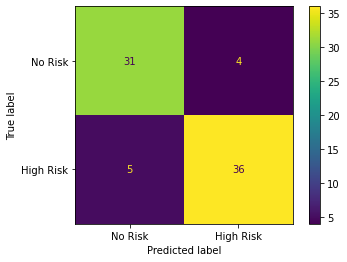

In [ ]:
cm = confusion_matrix(y_test, y_predict3)
disp = ConfusionMatrixDisplay(cm, display_labels = ['No Risk','High Risk']).plot()
plt.show()

In [ ]:
print(classification_report(y_test,y_predict3))

              precision    recall  f1-score   support

           0       0.86      0.89      0.87        35
           1       0.90      0.88      0.89        41

    accuracy                           0.88        76
   macro avg       0.88      0.88      0.88        76
weighted avg       0.88      0.88      0.88        76



<H1> Ensemble of KNN, Logistic Regression & Naive Bayes </H1>

In [ ]:
result = []
for i in range(len(y_test)):
  if y_predict3[i] + predictions[i] + y_predict[i] >= 2:
    result.append(1)
  else:
    result.append(0)      
print(confusion_matrix(y_test, result))
print(classification_report(y_test,result)) 

[[31  4]
 [ 3 38]]
              precision    recall  f1-score   support

           0       0.91      0.89      0.90        35
           1       0.90      0.93      0.92        41

    accuracy                           0.91        76
   macro avg       0.91      0.91      0.91        76
weighted avg       0.91      0.91      0.91        76

